<a href="https://colab.research.google.com/github/Swayyum/Intro-to-ML--4105/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
  inflating: ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4383).jpg  
  inflating: ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4384).jpg  
  inflating: ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4385).jpg  
  inflating: ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4386).jpg  
  inflating: ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4387).jpg  
  inflating: ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor

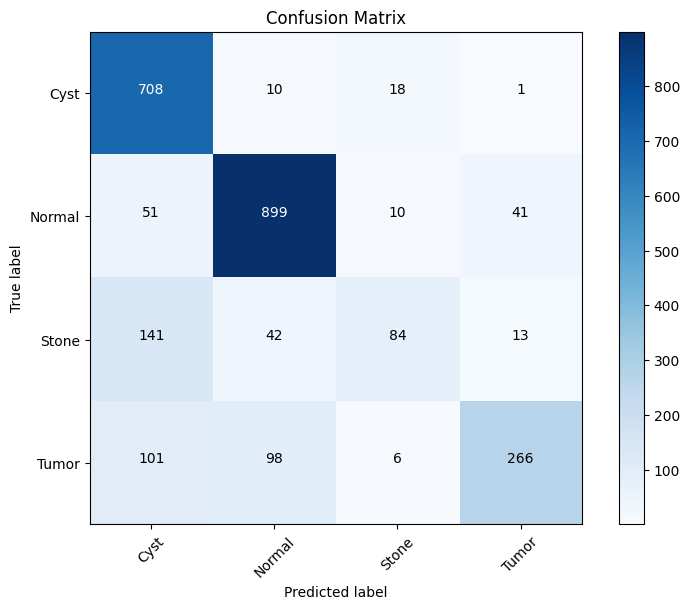

Model evaluation completed.
Accuracy: 0.786
Precision: 0.791
Recall: 0.786
F1 Score: 0.769
Classification Report:
              precision    recall  f1-score   support

        Cyst       0.71      0.96      0.81       737
      Normal       0.86      0.90      0.88      1001
       Stone       0.71      0.30      0.42       280
       Tumor       0.83      0.56      0.67       471

    accuracy                           0.79      2489
   macro avg       0.78      0.68      0.70      2489
weighted avg       0.79      0.79      0.77      2489



In [ ]:
! pip install -q kaggle

from google.colab import files
files.upload()

# Create Directory
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone
! mkdir ~/ct-kidney-dataset-normal-cyst-tumor-and-stone
! unzip ct-kidney-dataset-normal-cyst-tumor-and-stone.zip -d ct-kidney-dataset-normal-cyst-tumor-and-stone/

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import svm, metrics
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import layers, Sequential
import time
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define constants
batch_size = 32
img_height = 256
img_width = 256
data_dir='/content/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

# Load the dataset
print("Loading the dataset...")
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
val_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
print("Dataset loaded successfully.")

# Store class names before any transformation
class_names = train_dataset.class_names

# Data augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Function to preprocess and augment images
def preprocess_and_augment(data):
    images, labels = [], []
    for img_batch, label_batch in data:
        augmented_images = data_augmentation(img_batch, training=True)
        for img, label in zip(augmented_images, label_batch):
            images.append(img_to_array(img).flatten())
            labels.append(label.numpy())
    return np.array(images), np.array(labels)

# Normalize and transform the data
train = train_dataset.map(lambda x, y: (x / 255.0, y))
val = val_dataset.map(lambda x, y: (x / 255.0, y))

X_train, y_train = preprocess_and_augment(train)
X_val, y_val = preprocess_and_augment(val)

# Train an SVM classifier
print("Training the SVM model...")
start_time = time.time()
svm_model = svm.SVC(kernel='poly')
svm_model.fit(X_train, y_train)
print("SVM model trained.")

# Evaluate the SVM model
print("Evaluating the SVM model...")
y_pred = svm_model.predict(X_val)
print("Classification Report:")
print(metrics.classification_report(y_val, y_pred))

end_time = time.time()  # End time
training_time = end_time - start_time  # Calculate the training time
print(f"SVM model trained in {training_time:.3f} seconds.")


# Display confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[i])):
        plt.text(j, i, str(confusion_matrix[i][j]), horizontalalignment="center", color="white" if confusion_matrix[i, j] > confusion_matrix.max() / 2 else "black")
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print("Model evaluation completed.")

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the classification report
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Classification Report:")
print(classification_report(y_val, y_pred, target_names=class_names))

Processing file: /content/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1279).jpg
Processing file: /content/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (3749).jpg
Processing file: /content/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone- (848).jpg
Processing file: /content/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (3375).jpg
Processing file: /content/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3432).jpg
Processing file: /content/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst

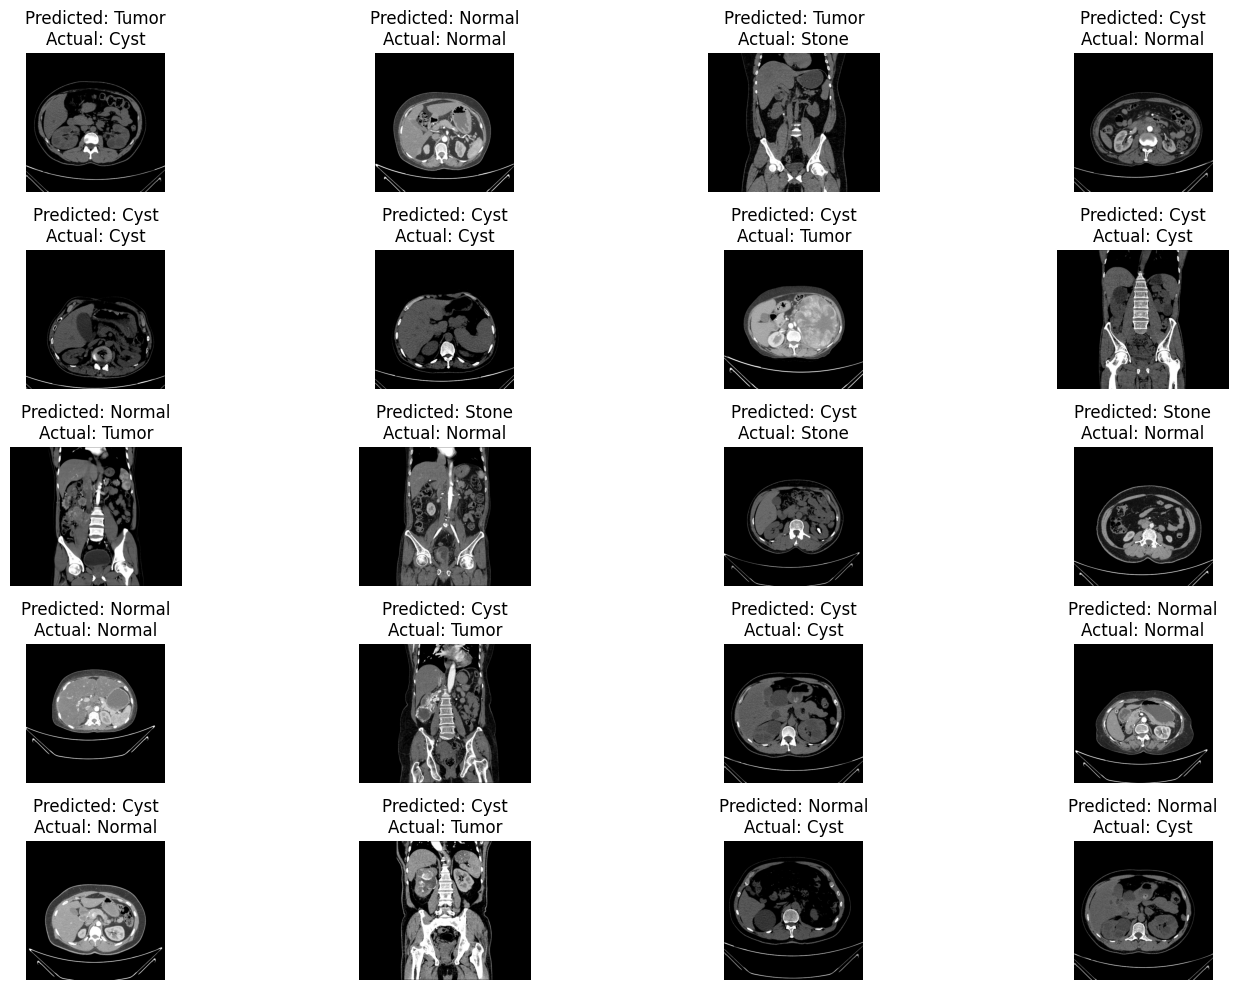

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import tensorflow as tf
from sklearn import metrics

def display_full_res_image(image_path, ax, pred_label, true_label, class_names):
    image = Image.open(image_path)
    image = np.array(image)
    # If the image is float, ensure it lies between [0,1]. If it's int, ensure it lies between [0,255].
    if image.dtype == np.float32:
        image = np.clip(image, 0, 1)  # Ensure the float image has values within [0,1]
    elif image.dtype == np.uint8:
        pass  # If image is uint8, it should already be within [0,255], so no need to clip
    ax.imshow(image, cmap='gray')  # Specify the colormap in case the images are grayscale
    ax.set_title(f'Predicted: {class_names[pred_label]}\nActual: {class_names[true_label]}')
    ax.axis('off')

# Directory of full-resolution images
full_res_dir = '/content/ct-kidney-dataset-normal-cyst-tumor-and-stone/'

# Get all file paths from the validation set subdirectories
val_file_paths = []
for root, dirs, files in os.walk(full_res_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Make sure to process image files only
            val_file_paths.append(os.path.join(root, file))

# Randomly select images from the validation set
chosen_file_paths = random.sample(val_file_paths, min(len(val_file_paths), 20))
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 10))  # Adjust nrows and ncols based on how many images you expect
axes = axes.flatten()

# Check if chosen_file_paths is not empty
if not chosen_file_paths:
    print("No file paths were selected. Check the directory path and contents.")

# You'll need to obtain y_pred using your trained SVM model on the unprocessed images
for idx, file_path in enumerate(chosen_file_paths):
    print(f"Processing file: {file_path}")  # Debugging statement
    true_label = os.path.basename(os.path.dirname(file_path))

    # Check if the true label is in class_names
    if true_label in class_names:
        true_label_idx = class_names.index(true_label)
        predicted_label_idx = y_pred[idx]  # This needs to be the index of the prediction corresponding to the file

        # Display the full-resolution image with prediction
        image = Image.open(file_path)
        axes[idx].imshow(image)
        axes[idx].set_title(f'Predicted: {class_names[predicted_label_idx]}\nActual: {true_label}')
        axes[idx].axis('off')
    else:
        print(f"Class name '{true_label}' found in the file path is not in the list of class names.")

# Check if the number of subplots matches the number of images
if len(chosen_file_paths) > len(axes):
    print(f"More chosen file paths ({len(chosen_file_paths)}) than axes ({len(axes)}) to plot them.")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X_combined = np.vstack((X_train, X_val))

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Use the elbow method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters, K')
plt.ylabel('Inertia')
plt.title('Optimal K')
plt.show()

elbow_point = np.argmax(np.diff(inertia)) + 1

# Print the best K value
print(f"The best value for K is: {elbow_point}")

best_k = None
highest_accuracy = 0
K_range = range(1, 11)
for k in K_range:
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)

    # Reshape kmeans.labels_ to a 2D array for concatenation
    kmeans_labels_train = kmeans.labels_[:len(X_train)].reshape(-1, 1)
    kmeans_labels_val = kmeans.labels_[len(X_train):].reshape(-1, 1)

    # Use cluster labels as additional features
    X_train_with_clusters = np.hstack((X_train, kmeans_labels_train))
    X_val_with_clusters = np.hstack((X_val, kmeans_labels_val))

    # Train your classifier (e.g., SVM) with the new dataset
    svm_model.fit(X_train_with_clusters, y_train)

    # Evaluate the model
    y_pred = svm_model.predict(X_val_with_clusters)
    accuracy = accuracy_score(y_val, y_pred)

    # Compare and store the best K
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_k = k

print(f"The best K value is {best_k} with an accuracy of {highest_accuracy}")